In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 6

# Covid-19 cases in Russia by region (before the 26th of June 2020)

In [114]:
df = pd.read_csv('C:\\Users\egors\\OneDrive\\Documents\\GitHub\\Homework_Project\\data\\covid19-russia-cases.csv')

In [115]:
df.head()

,Date,Region/City,Region/City-Eng,Region_ID,Day-Confirmed,Day-Deaths,Day-Recovered,Confirmed,Deaths,Recovered
0,2020-01-26,Diamond Princess,Diamond Princess,NaN,3.0,0.0,0.0,3.0,0.0,0.0
1,2020-01-31,Тюменская область,Tyumen region,72.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2020-01-31,Забайкальский край,Zabaykalsky Krai,75.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-02-12,Тюменская область,Tyumen region,72.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2020-02-12,Забайкальский край,Zabaykalsky Krai,75.0,0.0,0.0,1.0,1.0,0.0,1.0


## Statistics

In [116]:
df.dropna().mean()

Region_ID          44.167380
Day-Confirmed      85.989389
Day-Deaths          1.122540
Day-Recovered      44.698443
Confirmed        2465.368133
Deaths             26.559131
Recovered         817.680986
dtype: float64

In [117]:
df.dropna().median()

Region_ID         44.0
Day-Confirmed     31.0
Day-Deaths         0.0
Day-Recovered      6.0
Confirmed        528.0
Deaths             5.0
Recovered        111.0
dtype: float64

In [118]:
df.dropna().std()

Region_ID           25.116477
Day-Confirmed      362.601527
Day-Deaths           5.957315
Day-Recovered      269.397481
Confirmed        13302.622879
Deaths             173.327332
Recovered         5298.766832
dtype: float64

## Plots

### Confirmed cases/deaths/recovered per day in different regions:

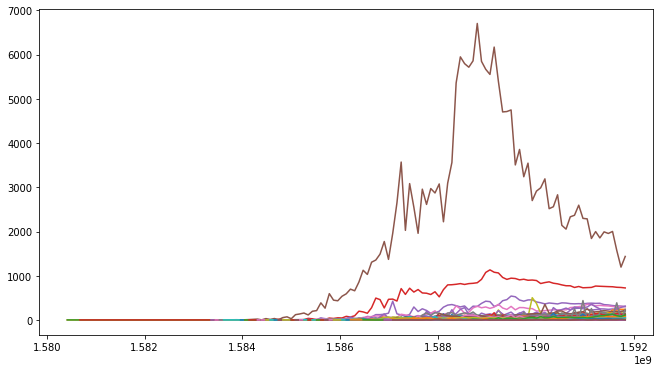

In [154]:
for el in df['Region_ID'].unique():
    df1 = df[df['Region_ID'] == el]
    plt.plot(df1['Date'].apply(lambda x: time.mktime(time.strptime(x, "%Y-%m-%d"))), df1['Day-Confirmed'])
plt.show()

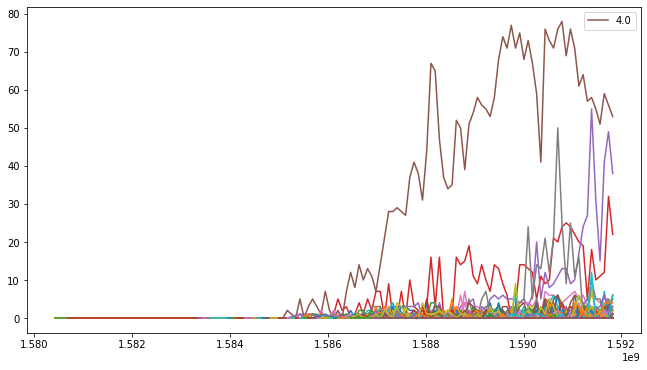

In [150]:

for el in df['Region_ID'].unique():
    df1 = df[df['Region_ID'] == el]
    plot, = plt.plot(df1['Date'].apply(lambda x: time.mktime(time.strptime(x, "%Y-%m-%d"))), df1['Day-Deaths'], label=el)
    plt.legend(handles=[plot])
plt.show()

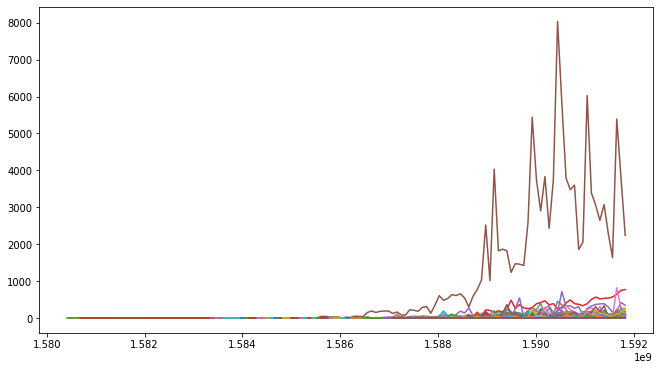

In [121]:
for el in df['Region_ID'].unique():
    df1 = df[df['Region_ID'] == el]
    plt.plot(df1['Date'].apply(lambda x: time.mktime(time.strptime(x, "%Y-%m-%d"))), df1['Day-Recovered'])
plt.show()

### Top 10 regions with the most total deaths over this period:

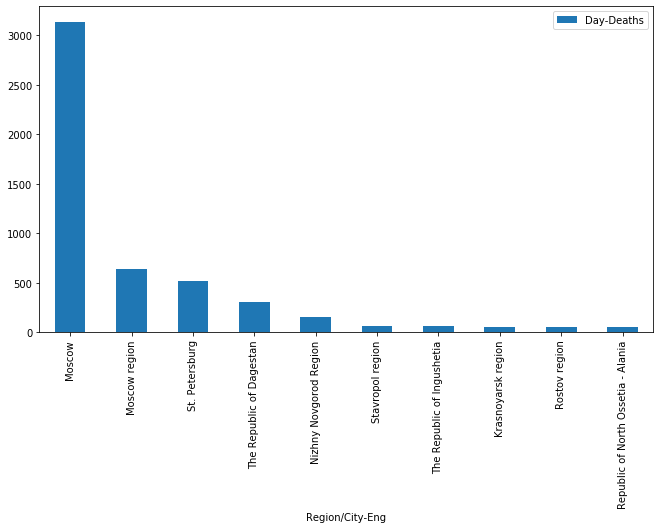

In [124]:
param = 'Day-Deaths'
grouped = df[['Region/City-Eng', param]].groupby(by='Region/City-Eng').sum()
sample = grouped.sort_values(by=param, ascending=False).head(10)
sample.plot.bar()

### 10 worst regions by death ratio

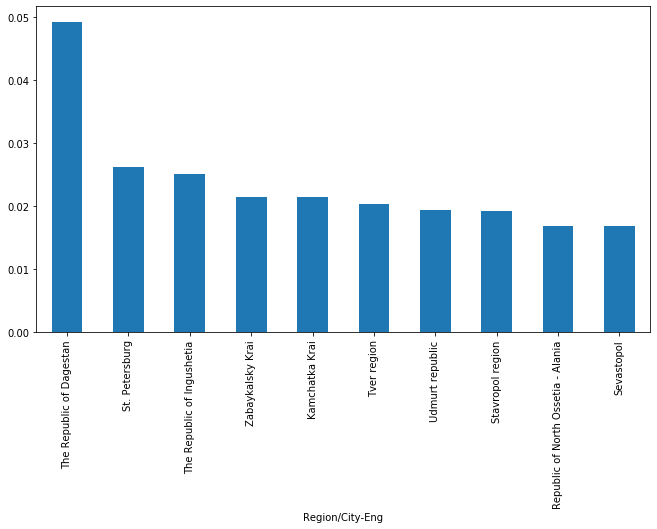

In [143]:
grouped = df[['Region/City-Eng', 'Day-Deaths', 'Day-Confirmed']].groupby(by='Region/City-Eng').sum()
ratio = grouped['Day-Deaths']/grouped['Day-Confirmed']
sample = ratio.sort_values(ascending=False).head(10)
sample.plot.bar()

## Summary

From the statistics we can see that over this time period, on average across Russia 1 person died every day from covid-19. However this figure varied significantly between regions. We can also see that the number of new confirmed cases was on average twice as high as the number of people recovered.

The plots show that Moscow had sky-high numbers of confirmed cases compared to any other region or city in Russia. You can also see an intuitive trend: first, confirmed cases peak, then deaths peak, and then recoveries peak. In other words, first people get sick, then those who are weak die, but those who don't take a bit more time to recover; This is exactly that but on a national scale.

The bar charts reveal that despite populous regions (like Moscow) having a bigger number of deaths in total, coronavirus proved more deadly in other places (like Dagestan).